# Linear Regression Single Neuron Model

In this notebook, we implement the single neuron model together with the gradient descent algorithm in order to solve the linear regression problem. We will focus on linear regression in the CVDs dataset.

In [4]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("https://raw.githubusercontent.com/YulinLi98/Sample_Repo/main/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Because we are assuming the target function $f:\mathcal{X} \rightarrow \mathcal{Y}$ is a **linear function of the input features**, and because we know single neuron models are good function approximators, we next build a single neuron model with a *linear-activation* function. Furthermore, in this model we choose the *mean-sqaured error* cost function:

$$
C(\mathbf{w}, b) = \frac{1}{2N}\sum_{i=1}^{N}\Big(\hat{y}^{(i)} - y^{(i)}\Big)^2. 
$$

For single neuron models in practice, stochastic gradient descent should be the preferred way for optimizing the weights and bias by minimizing the cost function. We implement stochastic gradient descent with the ```train``` method used in the following custom ```SingleNeuron``` class. 

In [7]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

In [ ]:
# Define linear activation function
def linear_activation(z):
    return z

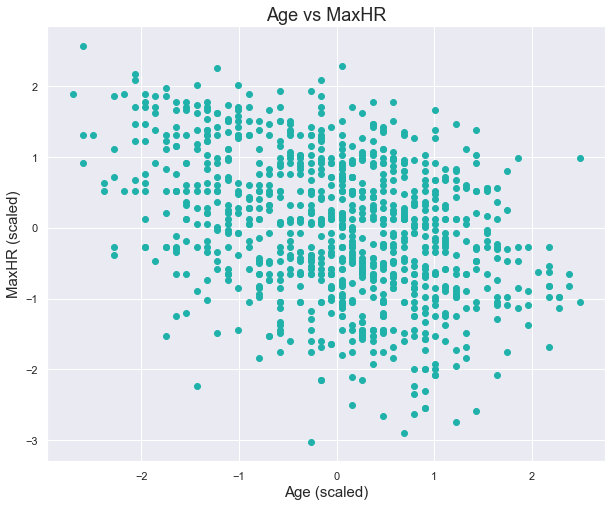

In [32]:
# Check the relationship between Age and MaxHR
from sklearn import preprocessing

# Data Formating
X = df.Age.values
X = X.reshape(-1, 1)
y = df.MaxHR.values

# Standardize the data
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

# Visualization
plt.figure(figsize = (10, 8))
plt.scatter(X_scaled, 
            y_scaled, 
            color = "lightseagreen")
plt.xlabel("Age (scaled)", fontsize = 15)
plt.ylabel("MaxHR (scaled)", fontsize = 15)
plt.title("Age vs MaxHR", fontsize = 18)
plt.show()

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

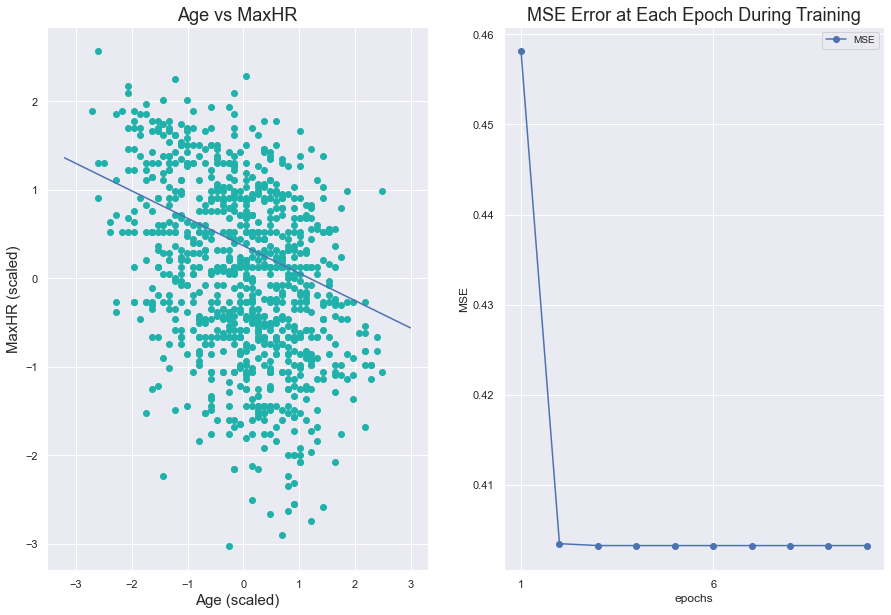

In [34]:
# Create and train an instance of the SingleNeuron Class
node = SingleNeuron(linear_activation)
node.train(X_scaled, y_scaled, epochs=10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

# Visualize the regression line
domain = np.linspace(np.min(X_scaled) - .5, np.max(X_scaled) + .5, 100)
ax1.scatter(X_scaled, y_scaled, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("Age (scaled)", fontsize = 15)
ax1.set_ylabel("MaxHR (scaled)", fontsize = 15)
ax1.set_title("Age vs MaxHR", fontsize = 18)

# visualize the mean-sqaured error at each epoch
ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

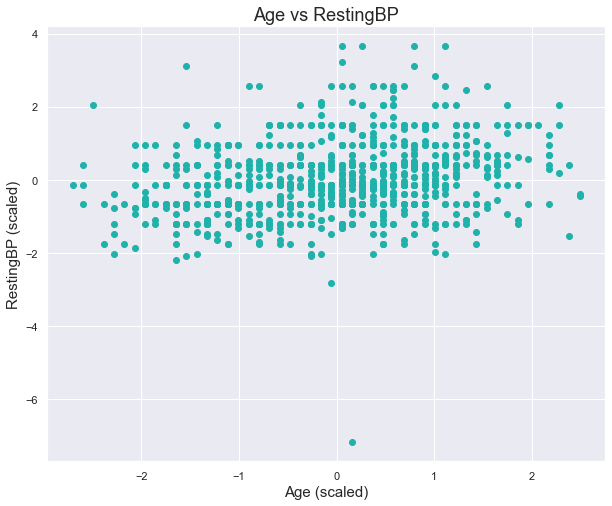

In [35]:
# Check the relationship between Age and RestingBP
X = df.Age.values
X = X.reshape(-1, 1)
y = df.RestingBP.values

# Standardize the data
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

# Visualization
plt.figure(figsize = (10, 8))
plt.scatter(X_scaled, 
            y_scaled, 
            color = "lightseagreen")
plt.xlabel("Age (scaled)", fontsize = 15)
plt.ylabel("RestingBP (scaled)", fontsize = 15)
plt.title("Age vs RestingBP", fontsize = 18)
plt.show()

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

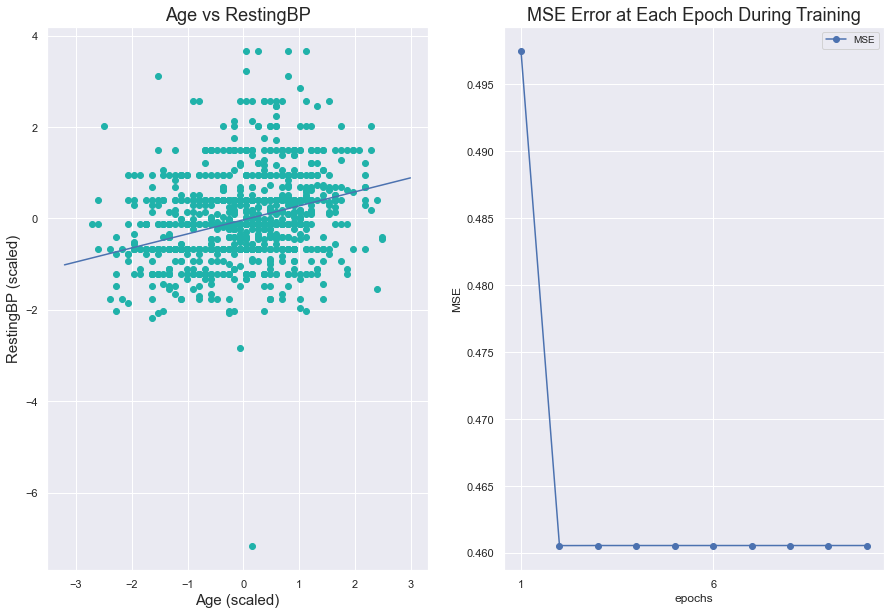

In [36]:
# Create and train an instance of the SingleNeuron Class
node = SingleNeuron(linear_activation)
node.train(X_scaled, y_scaled, epochs=10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

# Visualize the regression line
domain = np.linspace(np.min(X_scaled) - .5, np.max(X_scaled) + .5, 100)
ax1.scatter(X_scaled, y_scaled, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("Age (scaled)", fontsize = 15)
ax1.set_ylabel("RestingBP (scaled)", fontsize = 15)
ax1.set_title("Age vs RestingBP", fontsize = 18)

# visualize the mean-sqaured error at each epoch
ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

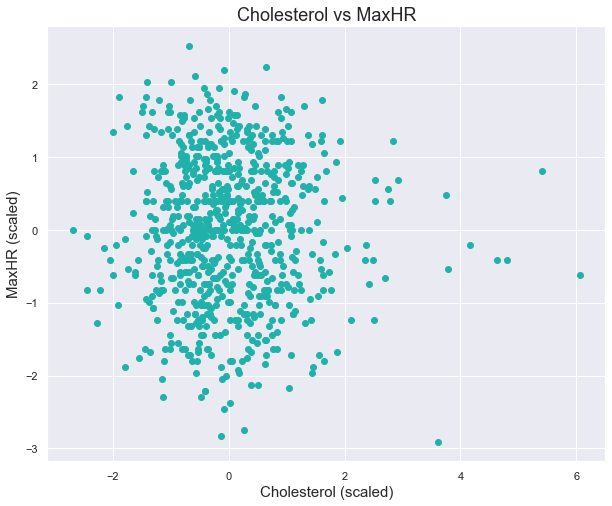

In [38]:
# Check the relationship between Cholesterol and MaxHR
X = df[df.Cholesterol > 0].Cholesterol.values
X = X.reshape(-1, 1)
y = df[df.Cholesterol > 0].MaxHR.values

# Standardize the data
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

# Visualization
plt.figure(figsize = (10, 8))
plt.scatter(X_scaled, 
            y_scaled, 
            color = "lightseagreen")
plt.xlabel("Cholesterol (scaled)", fontsize = 15)
plt.ylabel("MaxHR (scaled)", fontsize = 15)
plt.title("Cholesterol vs MaxHR", fontsize = 18)
plt.show()

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

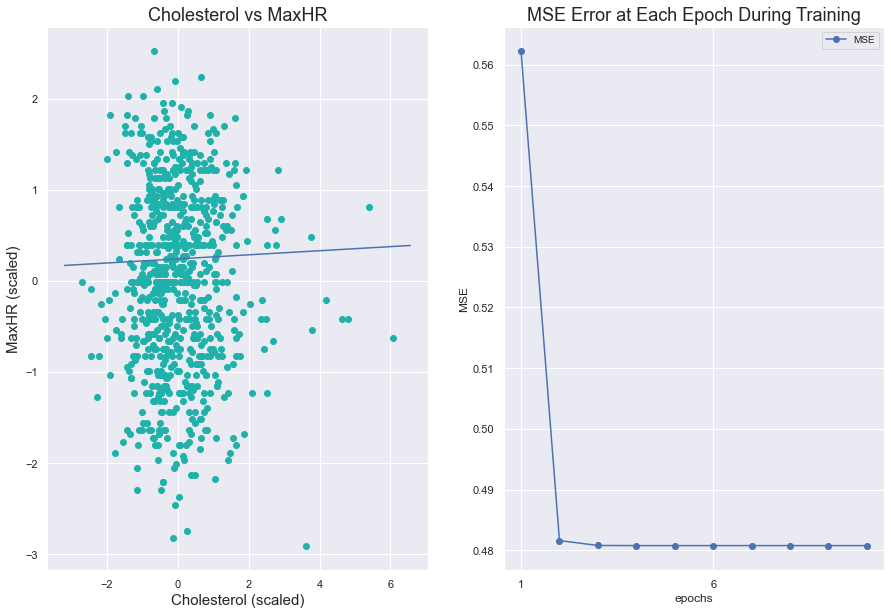

In [40]:
# Create and train an instance of the SingleNeuron Class
node = SingleNeuron(linear_activation)
node.train(X_scaled, y_scaled, epochs=10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

# Visualize the regression line
domain = np.linspace(np.min(X_scaled) - .5, np.max(X_scaled) + .5, 100)
ax1.scatter(X_scaled, y_scaled, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("Cholesterol (scaled)", fontsize = 15)
ax1.set_ylabel("MaxHR (scaled)", fontsize = 15)
ax1.set_title("Cholesterol vs MaxHR", fontsize = 18)

# visualize the mean-sqaured error at each epoch
ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

C:\Users\lyl98\AppData\Local\Temp/ipykernel_94408/3004497820.py:44: RuntimeWarning: overflow encountered in double_scalars
  errors += .5*((self.predict(xi) - target)**2)
C:\Users\lyl98\AppData\Local\Temp/ipykernel_94408/3004497820.py:43: RuntimeWarning: overflow encountered in double_scalars
  self.w_[-1] -= alpha*(self.predict(xi) - target)
C:\Users\lyl98\AppData\Local\Temp/ipykernel_94408/3004497820.py:49: RuntimeWarning: invalid value encountered in double_scalars
  preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]


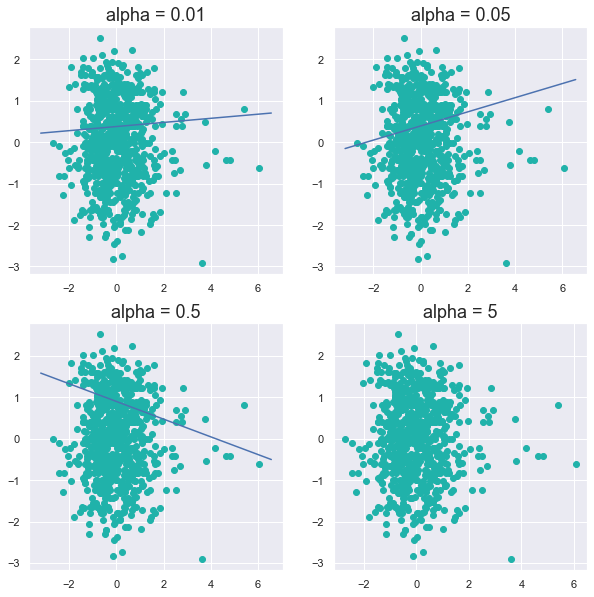

In [45]:
# Experiment with different learning rate
alphas = [0.01, 0.05,  0.5, 5]

domain = np.linspace(np.min(X_scaled) - .5, np.max(X_scaled) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X_scaled, y_scaled, epochs=10, alpha = alpha)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X_scaled, y_scaled, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)